In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Processing Image 1: /content/drive/MyDrive/CV Assignment Q1./RGB image 1.jpg (Resized to (2736, 1824))


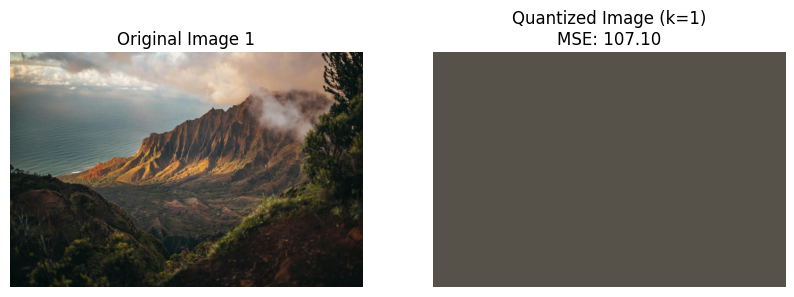

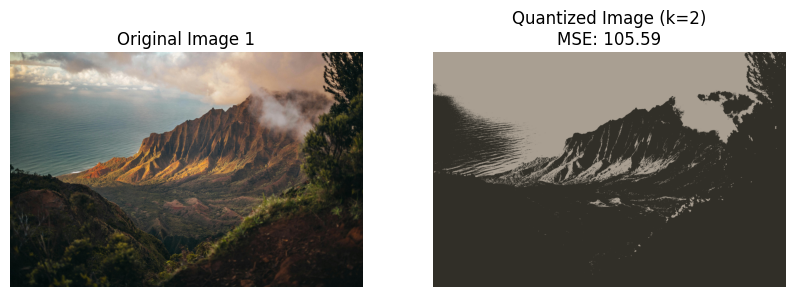

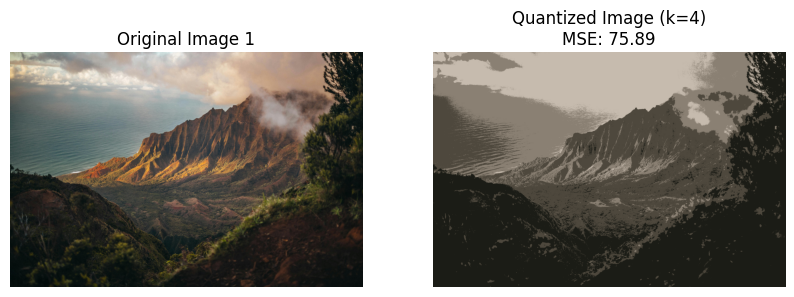

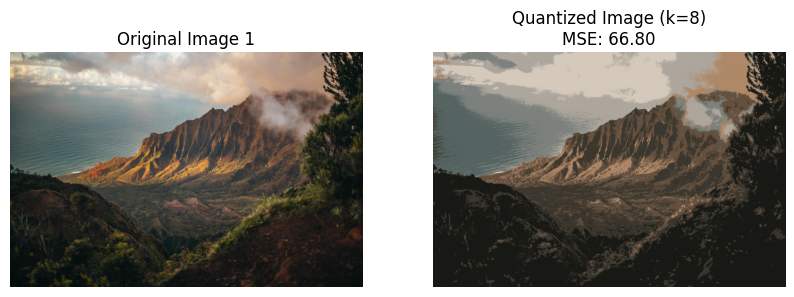

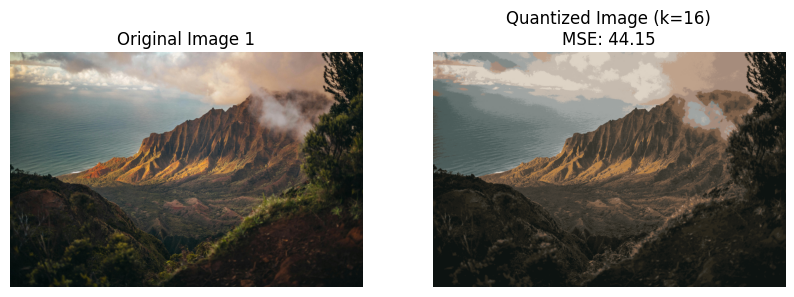

Processing Image 2: /content/drive/MyDrive/CV Assignment Q1./RGB image 2.jpg (Resized to (3000, 2000))


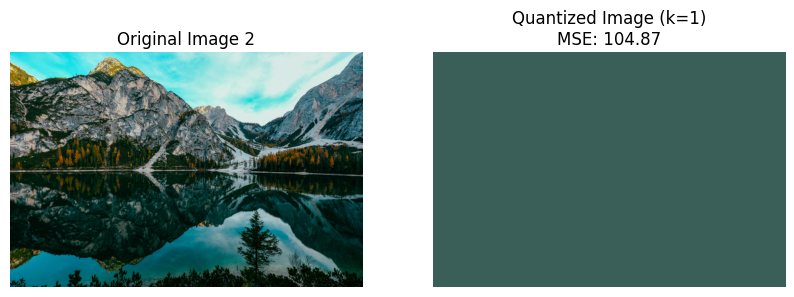

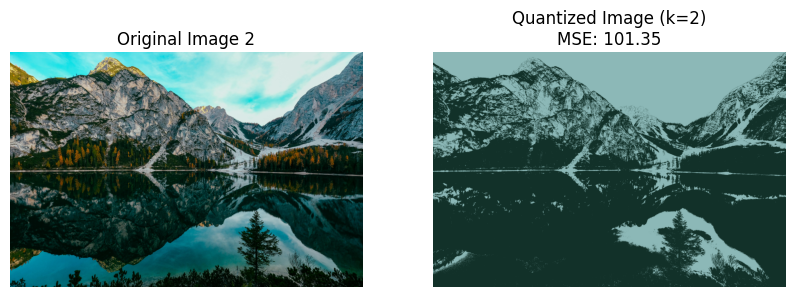

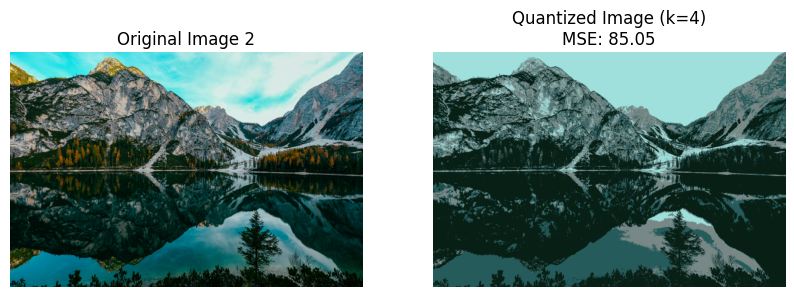

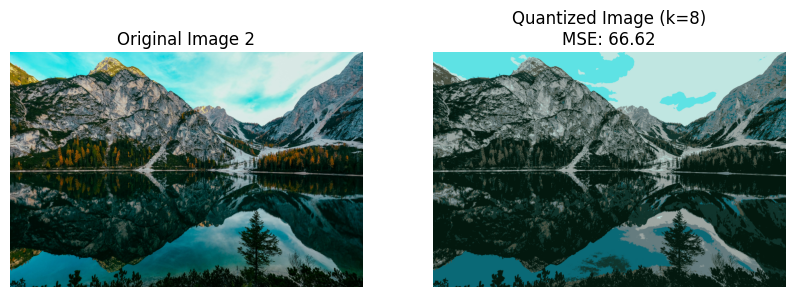

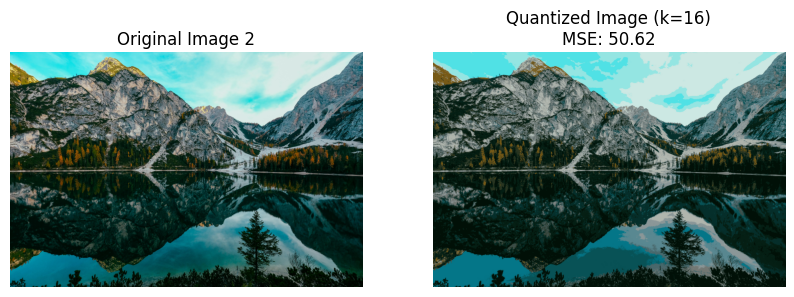

Processing Image 3: /content/drive/MyDrive/CV Assignment Q1./RGB image 3.jpg (Resized to (2113, 1423))


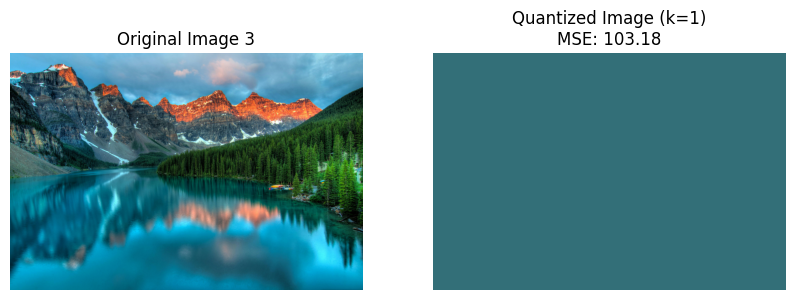

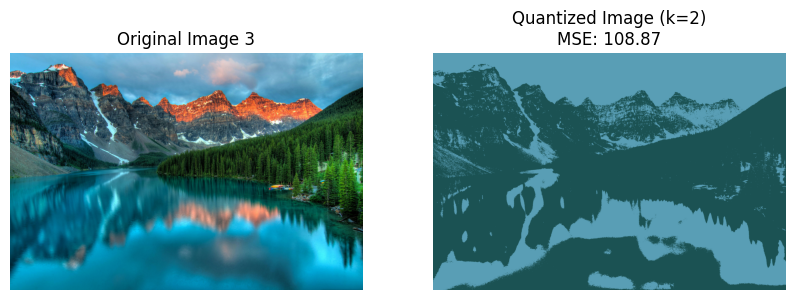

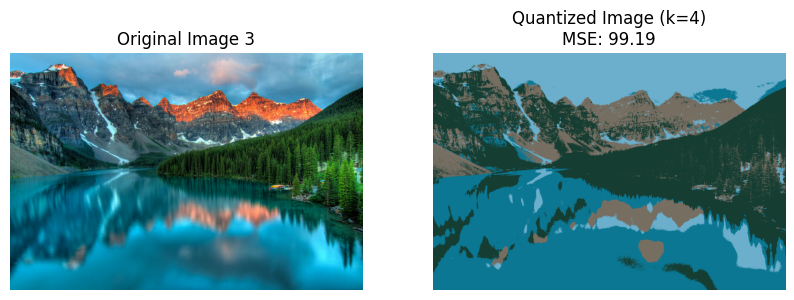

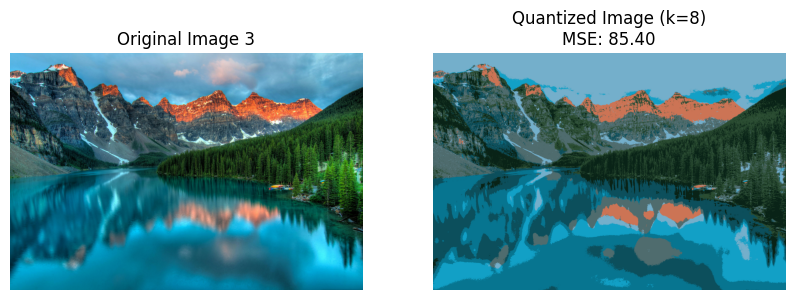

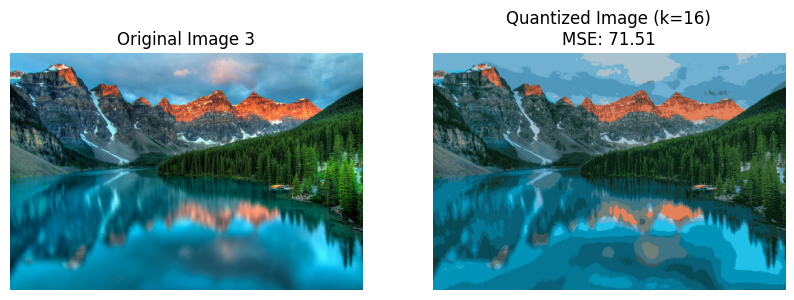

In [2]:
#Q.1

import numpy as np
import cv2
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original_image, quantized_image):
    return mean_squared_error(original_image.flatten(), quantized_image.flatten())

# Function to perform k-Means image quantization using MiniBatchKMeans
def kmeans_quantization(image, k, max_iter=100):
    # Reshape the image to be a list of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Use MiniBatchKMeans for faster performance
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, max_iter=max_iter, batch_size=1000, n_init=10)
    kmeans.fit(pixel_values)

    # Get the cluster centers (quantized colors)
    centers = np.uint8(kmeans.cluster_centers_)

    # Map each pixel to its nearest center
    labels = kmeans.labels_

    # Reshape labels back to the image dimensions
    quantized_image = centers[labels.flatten()]
    quantized_image = quantized_image.reshape(image.shape)

    return quantized_image

# Function to plot original and quantized images
def plot_images(original, quantized, k, mse, image_index):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {image_index}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB))
    plt.title(f'Quantized Image (k={k})\nMSE: {mse:.2f}')
    plt.axis('off')

    plt.show()

# Main function to process three images
def process_images(image_paths, resize_factor=0.5):
    # Varying values of k for quantization
    k_values = [1, 2, 4, 8, 16]

    for image_index, image_path in enumerate(image_paths):
        # Load the image
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Resize the image to speed up processing
        height, width = image.shape[:2]
        new_size = (int(width * resize_factor), int(height * resize_factor))
        resized_image = cv2.resize(image, new_size)

        print(f"Processing Image {image_index + 1}: {image_path} (Resized to {new_size})")

        # Perform quantization for each k
        for k in k_values:
            quantized_image = kmeans_quantization(resized_image, k)

            # Calculate Mean Squared Error
            mse = calculate_mse(resized_image, quantized_image)

            # Display the original and quantized images
            plot_images(resized_image, quantized_image, k, mse, image_index + 1)

if __name__ == "__main__":
    # List of paths to the three images
    image_paths = [
        "/content/drive/MyDrive/CV Assignment Q1./RGB image 1.jpg",  # first image
        "/content/drive/MyDrive/CV Assignment Q1./RGB image 2.jpg",  # second image
        "/content/drive/MyDrive/CV Assignment Q1./RGB image 3.jpg"   # third image
    ]

    process_images(image_paths, resize_factor=0.5)  # Resize images to 50% of their original size for faster processing


Number of connected components (excluding background): 6265


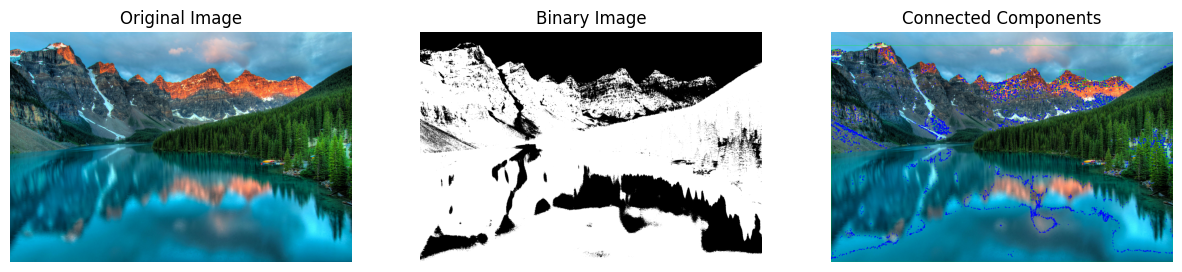

In [3]:
#Q.2
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_connected_components(image):
    """
    Find and visualize connected components in the image.

    :param image: Input RGB image
    """
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold (Otsu's thresholding)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Display the number of connected components (excluding the background component)
    print(f"Number of connected components (excluding background): {num_labels - 1}")

    # Create an output image to visualize the components
    output_image = image.copy()

    # Loop over the connected components and draw bounding boxes
    for i in range(1, num_labels):  # Skipping label 0 (background)
        x, y, w, h, area = stats[i]

        # Draw a bounding box around each component
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Optionally, draw the centroid
        cx, cy = centroids[i]
        cv2.circle(output_image, (int(cx), int(cy)), 5, (255, 0, 0), -1)

    # Plot the original image, binary image, and output image
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Connected Components")
    plt.axis('off')

    plt.show()

def main():
    # Load an image /your image path)
    image_url = '/content/drive/MyDrive/CV Assignment Q1./RGB image 3.jpg'
    image = cv2.imread(image_url)

    if image is None:
        print(f"Error: Couldn't load the image at {image_url}.")
        return

    # Find and visualize connected components
    find_connected_components(image)

if __name__ == "__main__":
    main()

PSNR between downsampled and reference image: 31.06 dB
MSE between downsampled and reference image: 50.96


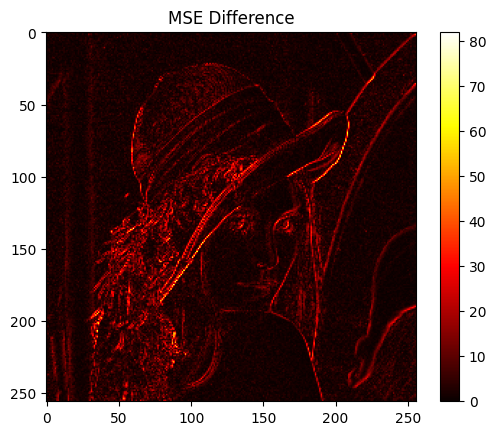

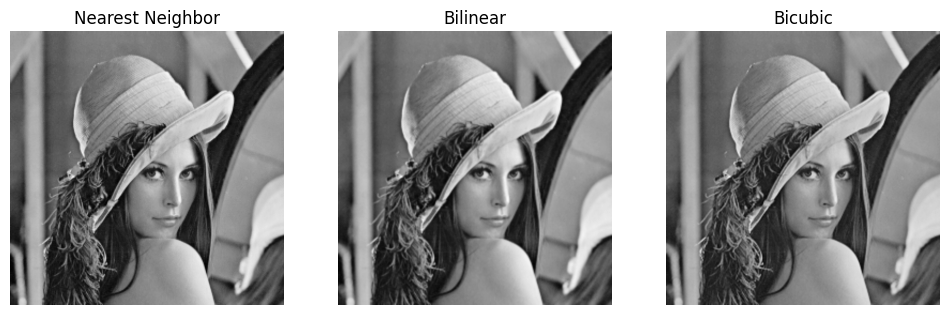

In [4]:
#Q.3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def downsample_image(image, size=(256, 256)):
    """
    Downsample the image to the given size.

    :param image: Input image.
    :param size: The target size for downsampling (default 256x256).
    :return: Downsampled image.
    """
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def compare_images(image1, image2):
    """
    Compare two images by calculating the PSNR and MSE.

    :param image1: First input image.
    :param image2: Second input image.
    :return: PSNR value and MSE value.
    """
    psnr_value = psnr(image1, image2)
    mse_value = mse(image1, image2)
    return psnr_value, mse_value

def resize_image(image, size=(512, 512), method='nearest'):
    """
    Resize the image to the given size using the specified interpolation method.

    :param image: Input image.
    :param size: The target size for resizing (default 512x512).
    :param method: Interpolation method ('nearest', 'bilinear', 'bicubic').
    :return: Resized image.
    """
    if method == 'nearest':
        return cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)
    elif method == 'bilinear':
        return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)
    elif method == 'bicubic':
        return cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)

def plot_images(images, titles):
    """
    Plot a set of images with titles.

    :param images: List of images to plot.
    :param titles: List of titles for the images.
    """
    plt.figure(figsize=(12, 8))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

def plot_mse_difference(image1, image2):
    """
    Plot the Mean Squared Error (MSE) difference between two images.

    :param image1: First image.
    :param image2: Second image.
    """
    mse_diff = np.abs(image1.astype('float') - image2.astype('float'))
    plt.imshow(mse_diff, cmap='hot')
    plt.colorbar()
    plt.title('MSE Difference')
    plt.show()

def main():
    # Step 1: Load the original grayscale 'lena_gray_512.tif' image
    image_512 = cv2.imread('/content/drive/MyDrive/CV Assignment Q.3/lena_gray_512.tif', cv2.IMREAD_GRAYSCALE)

    # Step 2: Downsample the image to 256x256
    image_256_downsampled = downsample_image(image_512, size=(256, 256))
    cv2.imwrite('reduce_lena_256.tif', image_256_downsampled)

    # Step 3: Load the reference 'lena_gray_256.tif' image
    image_256_reference = cv2.imread('/content/drive/MyDrive/CV Assignment Q.3/lena_gray_256.tif', cv2.IMREAD_GRAYSCALE)

    # Step 4: Compare the downsampled image with the reference image (PSNR and MSE)
    psnr_value, mse_value = compare_images(image_256_downsampled, image_256_reference)
    print(f"PSNR between downsampled and reference image: {psnr_value:.2f} dB")
    print(f"MSE between downsampled and reference image: {mse_value:.2f}")

    # Plot the MSE difference
    plot_mse_difference(image_256_downsampled, image_256_reference)

    # Step 5: Resize the downsampled image back to 512x512 using different interpolation methods
    resized_nearest = resize_image(image_256_downsampled, size=(512, 512), method='nearest')
    resized_bilinear = resize_image(image_256_downsampled, size=(512, 512), method='bilinear')
    resized_bicubic = resize_image(image_256_downsampled, size=(512, 512), method='bicubic')

    # Step 6: Plot the resized images
    plot_images([resized_nearest, resized_bilinear, resized_bicubic],
                ['Nearest Neighbor', 'Bilinear', 'Bicubic'])

if __name__ == "__main__":
    main()


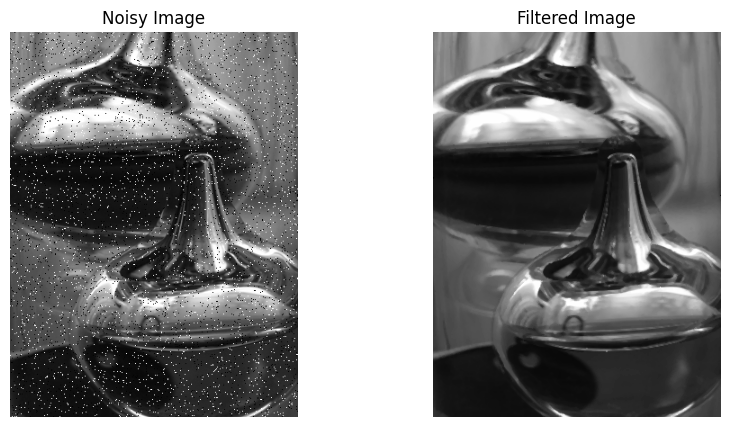

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Step 1: Load the noisy image
image_path = '/content/drive/MyDrive/CV Assignment Q.4/Noisy image.png'  # replace with your file path if needed
noisy_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Step 2: Convert image to numpy array
noisy_image_np = np.array(noisy_image)

# Step 3: Apply median filter to remove noise
filtered_image_np = median_filter(noisy_image_np, size=3)

# Step 4: Display the original noisy image and the filtered image
plt.figure(figsize=(10, 5))

# Original noisy image
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image_np, cmap='gray')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image_np, cmap='gray')
plt.axis('off')

plt.show()


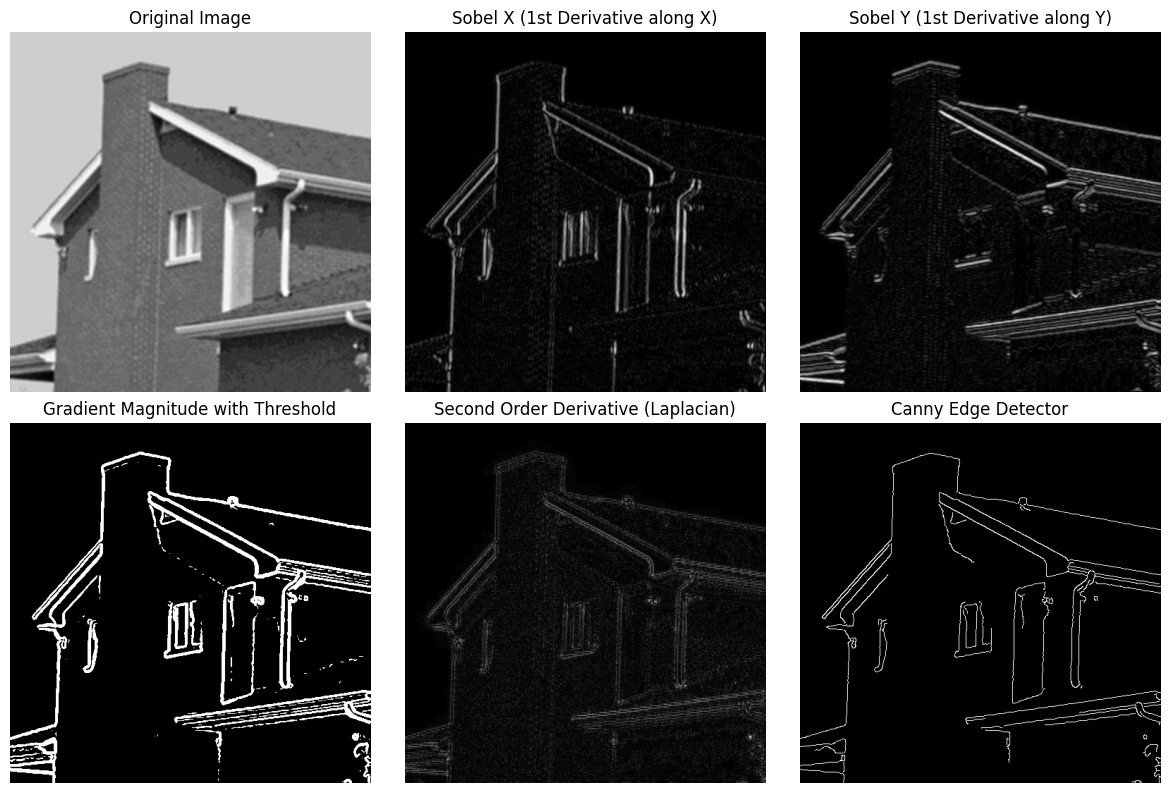

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

# Load the image
image_path = '/content/drive/MyDrive/Assignment 1 database/Q5/house.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Compute the first order derivative along 'x' (Sobel)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Step 2: Compute the first order derivative along 'y' (Sobel)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 3: Compute the gradient magnitude image
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Step 4: Thresholding the gradient magnitude to output an edge map
_, edge_map = cv2.threshold(gradient_magnitude, 100, 255, cv2.THRESH_BINARY)

# Step 5: Edge map using the second-order derivative (Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Step 6: Edge map using LoG (Laplacian of Gaussian)
log = gaussian_laplace(image, sigma=1)

# Step 7: Edge map using the Canny edge detector
canny_edges = cv2.Canny(image, 100, 200)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Sobel X (1st Derivative along X)")
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Sobel Y (1st Derivative along Y)")
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Gradient Magnitude with Threshold")
plt.imshow(edge_map, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Second Order Derivative (Laplacian)")
plt.imshow(np.abs(laplacian), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Canny Edge Detector")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
